In [27]:
import nltk 
import pandas as pd 
import os
from sklearn.model_selection import train_test_split


Given that the UCI data was in CSV format, it seemed simplest to import as a dataframe. I then appended the column headers for analytics purposes. 

In [21]:
# import data and add column names
columns = ['class','word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our',
           'word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail', 
           'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses', 
           'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit',
           'word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl',
           'word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet',
           'word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology',
           'word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting',
           'word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table',
           'word_freq_conference','char_freq_;','char_freq_(','char_freq_[','\char_freq_!','char_freq_$',
           'char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total']

raw_df = pd.read_csv(os.getcwd() + '/spambase/spambase.data', names=columns)

I then randomized the data before splitting the data into separate dataframes for the class and features. 

In [51]:
random_df = raw_df.sample(frac=1).reset_index(drop=True)
spam = random_df['class']
features = random_df.drop('class', axis=1)

To acommodate NLTK's formatting requirements, I created a feature generator function to conver each row of features within the dataframe into a dictionary. I then used list comprehension to combine the features dictionaries and class as two parts of a tuple to be fed into the classification algorithms. Finally, I split the data into training and test sets. 

In [52]:
# create feature dictionary based on dataframe 
def feature_gen(sample): 
    return sample.to_dict()

In [53]:
# create feature list for nltk classification format 
featureset = [(feature_gen(features.iloc[idx]), spam.iloc[idx]) for idx in features.index]

In [57]:
# create train and test sets 
train_set, test_set = featureset[1000:], featureset[:1000]

I tried both a Naive Bayes classifier along with a Decision Tree one. I attempted a Max Entropy classifier, but my machine was not able to run it in a timely matter. After training the two classifiers, I computed accuracy rates on the test set for both. 

In [67]:
# train various classifiers 
classifier_nb       = nltk.NaiveBayesClassifier.train(train_set)
# classifier_max_ent  = nltk.classify.MaxentClassifier.train(train_set)
classifier_dec_tree = nltk.DecisionTreeClassifier.train(train_set)

In [69]:
test_acc_nb       = nltk.classify.accuracy(classifier_nb, test_set)
# test_acc_max_ent  = nltk.classify.accuracy(classifier_max_ent, test_set)
test_acc_dec_tree = nltk.classify.accuracy(classifier_dec_tree, test_set)

As you can see from the chart below, the Naive Bayes classifier outperformed the Decision Tree one by several percentage points. Both performed OK with accuracy in the high 70s to low 80s. 

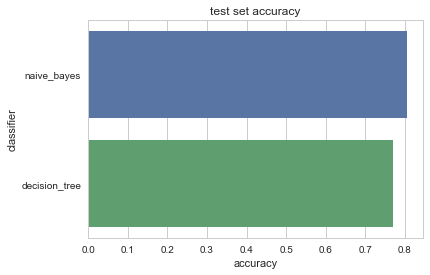

In [74]:
test_acc_df = pd.DataFrame({'classifier': ['naive_bayes', 'decision_tree'],
                            'accuracy' : [test_acc_nb, test_acc_dec_tree]})
import seaborn as sns
sns.set(style='whitegrid')
ax = sns.barplot(x='accuracy', y='classifier', 
                 data=test_acc_df).set_title('test set accuracy')

The top 5 most informative featues for the Naive Bayes classifier are listed below. The top two seem related to dates, years specifically, with the frequency of 000 and 1999 seeming to be the most predictive features available. 

In [75]:
classifier_nb.show_most_informative_features(5)

Most Informative Features
           word_freq_000 = 0.09             0.09 : 0.0    =    299.4 : 1.0
          word_freq_1999 = 0.29             0.14 : 0.0    =    297.0 : 1.0
       word_freq_meeting = 0.2               0.1 : 0.0    =    253.8 : 1.0
        word_freq_people = 0.19             1.18 : 0.0    =    193.1 : 1.0
      word_freq_internet = 0.09             0.09 : 0.0    =    192.1 : 1.0
